In [107]:
using CairoMakie
using Plots
# Warning!!! Because we have similar functions in Plots, and Makie, it would be safer to specify the function sources from now on. For example for the plot function we need 
# to set either Plots.plot   or   CairoMakie.plot! 

1. Solve the wave equation `dt^2 u(t,x) = dx^2 u(t,x)` numerically. Use a `1+1`-dimensional domain, and use Dirichlet boundary conditions `u(t,-L) = u(t,+L) = 0`. Use the spatial domain bounds `[-1; +1]`, and use the Gaussian-like function `f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2)` as initial condition. Use `L=1, A=1, W=0.2` as parameters. Evolve from `t=0` to `t=4L`, i.e. for two crossing times. Plot the result.

In [108]:
#  We are defining out grid here: 
function coords(nn, ni, dt, dx)
    t = [n * dt for i in 0:ni, n in 0:nn]
    x = [-1 + i * dx for i in 0:ni, n in 0:nn]
    return t, x
end;

In [109]:
#  Here we can define number of grid points in each dimension, and also the evolution time and spatial domain for our solution
T = 1; # Evolution time
L = 2; # spatial domain
nn = 800 #grid points in time
ni = 200  # grid points in x
dt = T / nn #grid size in time
dx = L / ni # grid size in x
t, x = coords(nn, ni, dt, dx); #grid out put

In [110]:
# Define initial condition as a semi-gaussian function which is suggested in the question
# Here we would be defining the afformentioned semi-gaussian function on all our grid points in x, for the first 2 time slice in our 1+1 solution method. 
# this is crucial in our method, because we would not be using the initial time derivative of the funciton, we would have u(t=0), u(t=1n), u(x=-1), and u(x=1) 
# as our initial + boundary conditions
function gaussian(t, x, A,w)
    ni, nn = size(t)
    u = zeros(ni, nn)
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = A * exp(-0.5 * sin(2*π*(x[i,n]-t[i,n]))^2 /(w^2)) 
    end
    return u
end;

In [111]:
u = gaussian(t,x,1,0.2);

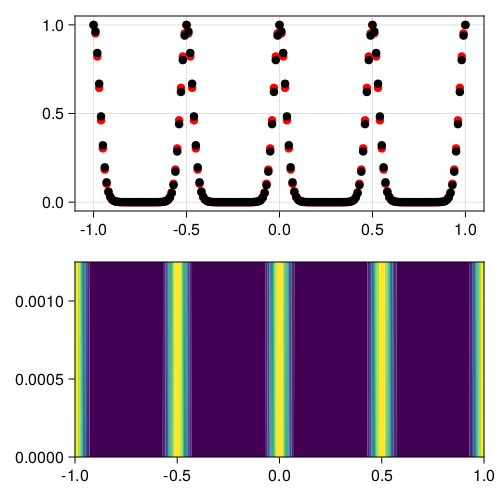

In [112]:
# visualizing the initial condirion
fig = Figure(resolution = (500, 500))
ax1 = Axis(fig[1, 1])
ax2 = Axis(fig[2, 1])
CairoMakie.contourf!(ax2,vec(x[:,1:2]), vec(t[:,1:2]), vec(u[:,1:2]))
CairoMakie.plot!(ax1,x[:,1], u[:,1],color=:red)
CairoMakie.plot!(ax1,x[:,2], u[:,2])
fig

### Comments on the boundary conditions:
However it has been asked to set boundaries to zero, but because the initial vale has a non zero value at the boundaries, setting them to zero cause a discontinuity which does not look good. It does not make the solution unstable though. I set the boundaries to 1 instead.  

In [113]:
# Evolution function which calculates the values for the input funciton by solving the wave equation using finite difference (centring) for the spatial derivative and then time derivatives
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / dx^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * dt^2 - u[i,n-2] + 2*u[i,n-1]
    return
end;

# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 1.0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 1.0
    return
end;

# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end;

# Main solution

In [114]:
T = 4;
L = 2;
nn = 3200
ni = 1600
dt = T / nn
dx = L / ni
t, x = coords(nn, ni, dt, dx);
u = gaussian(t,x,1,0.2);
evolve!(u, dt, dx);
dt,dx,dx/dt

(0.00125, 0.00125, 1.0)

[ Info: Saved animation to /home/hkhalvati/PSI-course/PSI-Course/tmp.gif


Plots.AnimatedGif("/home/hkhalvati/PSI-course/PSI-Course/tmp.gif")
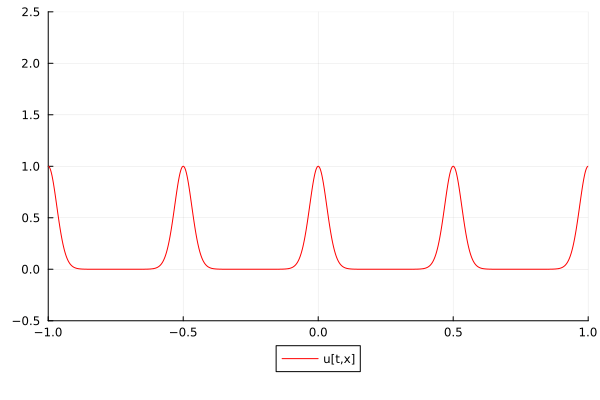

In [115]:
#  This gif shows the stability of the solution 
@gif for i in range(start = 1,stop = nn,step =10)
    p = Plots.plot(x[:,i], u[:,i],color=:red, xlims = (-1,1), ylims = (-0.5,2.5),legend=:outerbottom,label="u[t,x]")
end

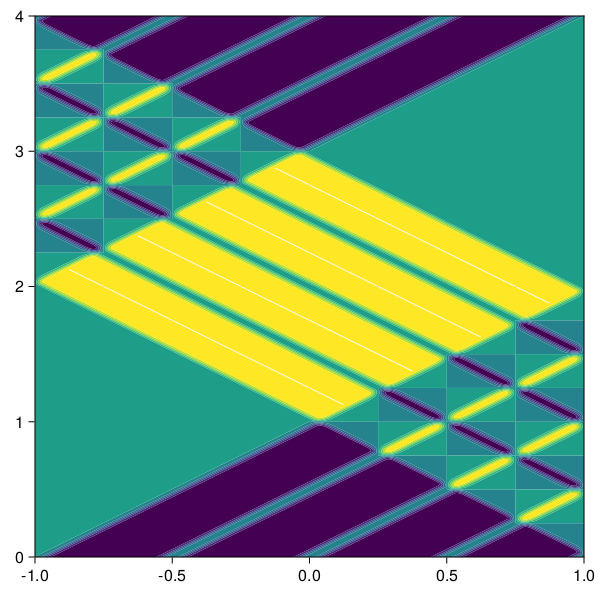

In [116]:
fig = Figure(resolution = (600, 600))
ax = Axis(fig[1, 1])
CairoMakie.contourf!(vec(x), vec(t), vec(u))
fig

## Study the solution for different dt s
### In fact, large or small dt should be in comparison with dx. Below we can see when they are equal:
### Here to check the stability of our solution, I am choosing T=2 in order to take shorter run-time.

(dt, dx, dx / dt) = (0.005, 0.005, 1.0)


[ Info: Saved animation to /home/hkhalvati/PSI-course/PSI-Course/tmp.gif


Plots.AnimatedGif("/home/hkhalvati/PSI-course/PSI-Course/tmp.gif")
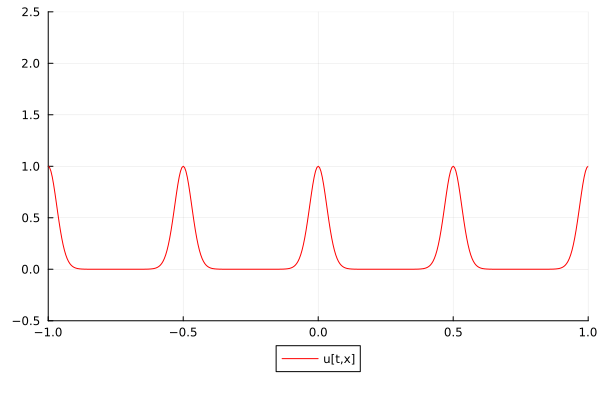

In [117]:
# For dx=dt, wich is the exact value of our wave speed based on the equation we get a very stable solution
T = 2;
L = 2;
nn = 400
ni = 400
dt = T / nn
dx = L / ni
t, x = coords(nn, ni, dt, dx);
u = gaussian(t,x,1,0.2);
evolve!(u, dt, dx);
@show dt,dx,dx/dt

@gif for i in range(start = 1,stop = nn,step =5)
    p = Plots.plot(x[:,i], u[:,i],color=:red, xlims = (-1,1), ylims = (-0.5,2.5),legend=:outerbottom,label="u[t,x]")
end


### Now we can see what happens if I set values such that dt gets slightly larger (~ 1e-3) than dx: 

(dt, dx, dx / dt) = (0.0050025, 0.005, 0.9995002498750625)


[ Info: Saved animation to /home/hkhalvati/PSI-course/PSI-Course/tmp.gif


Plots.AnimatedGif("/home/hkhalvati/PSI-course/PSI-Course/tmp.gif")
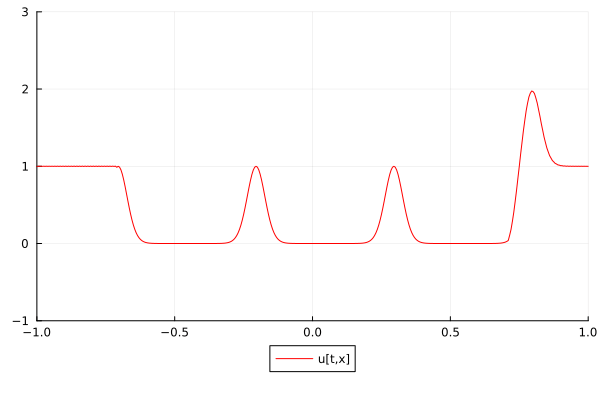

In [118]:
# Here up to 60th time step, n=60, the solution seems to be stable, until it is NOT, and it blows UP
T = 2.001;
L = 2;
nn = 400
ni = 400
dt = T / nn
dx = L / ni
t, x = coords(nn, ni, dt, dx);
u = gaussian(t,x,1,0.2);
evolve!(u, dt, dx);

@show dt,dx,dx/dt

@gif for i in range(start = 60,stop = 200,step =1)
    p = Plots.plot(x[:,i], u[:,i],color=:red, xlims = (-1,1), ylims = (-1,3),legend=:outerbottom,label="u[t,x]")
end

#### The reason behind this behavior in a very simple word is the fact that wave wants to propagate faster than the speed in which grid points are contacting each other, it means they are out of each other's (light)cones. 
## This limit is called Courant–Friedrichs–Lewy condition:
#### Which is $ v \frac{dt}{dx} \leq C_{max}$ in which $C$ is courant number $v$ is the wave speed which is $v = 1$ here. Typically, we can set $C_{max} = 1$  

#### for our solution we can have the limit as $ \frac{dx}{dt} \geq 1 $ 

## debugging

In [119]:
T = 4;
L = 2;
nn = 800
ni = 400
dt = T / nn
dx = L / ni

# dx =  dx/2;
# dt  = dt/2;


t, x = coords(nn, ni, dt, dx);
u = gaussian(t,x,1,0.2);


for n in 3:nn
    u[1,n] = 1.0
    for i in 2:ni
        uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / dx^2
        u[i,n] = uxx * dt^2 - u[i,n-2] + 2*u[i,n-1]
    end
    u[ni+1,n] = 1.0
end

[ Info: Saved animation to /home/hkhalvati/PSI-course/PSI-Course/tmp.gif


Plots.AnimatedGif("/home/hkhalvati/PSI-course/PSI-Course/tmp.gif")
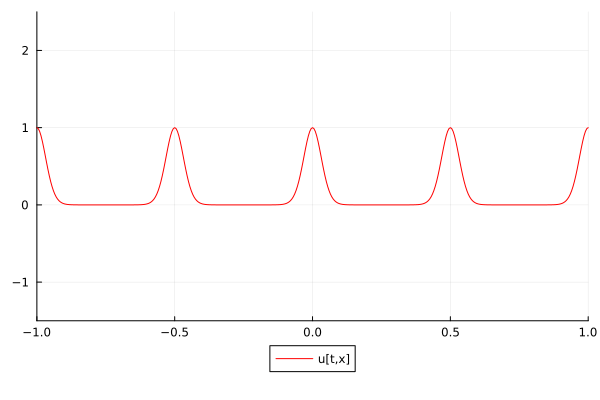

In [120]:
@gif for i in range(start = 1,stop = nn,step =2)
    p = Plots.plot(x[:,i], u[:,i],color=:red, xlims = (-1,1), ylims = (-1.5,2.5),legend=:outerbottom,label="u[t,x]")
end

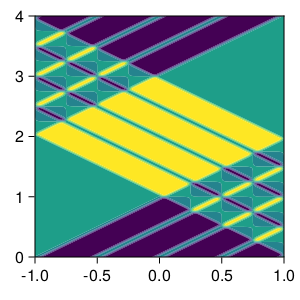

In [121]:
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
CairoMakie.contourf!(vec(x), vec(t), vec(u))
fig

## The energy density of a scalar wave:
$$ epsilon(t,x) = \frac{1}{2} ( \frac{d u(t,x)}{dt}^2 + (\frac{d u(t,x)}{dx}^2)$$
### In the following we would calculate the energy density of our solution, and then using the provided integrator, I have plotted the total energy as a function of time. 

In [122]:
function density(u,dx,dt)
    ni, nn = size(u)
    ut = zeros(ni, nn)
    ux = zeros(ni, nn)  
    epsilon = zeros(ni, nn)
    
    for n in 2:nn-1
        ut[1,n] = NaN
        ux[1,n] = NaN
        for i in 2:ni-1  
            ut[i,n] = (u[i,n+1] - u[i,n-1]) / dt;
            ux[i,n] = (u[i+1,n] - u[i-1,n]) / dx;
            epsilon[i,n] = 0.5 * (ut[i,n]^2 + ux[i,n]^2)
        end
        ut[ni,n] = NaN
        ux[ni,n] = NaN
    end
    return epsilon
end

density (generic function with 1 method)

In [123]:
# Integrate `epsilon` over space
function integrate(epsilon, n, dx)
    ni, nt = size(epsilon)
    # The boundary points are special; they have a weight of 1/2.
    # There are `ni` points overall, and the grid spacing is `dx = 2L/(ni-1)`.
    # Integrating the constant function `epsilon=1` thus gives exactly `2L`.
    E = epsilon[1, n] / 2
    for i in 2:ni-1
        E += epsilon[i, n]
    end
    E += epsilon[ni, n] / 2
    # Scale by the grid spacing
    E *= dx
    return E
end

integrate (generic function with 1 method)

(dt, dx, dx / dt) = (0.005, 0.005, 1.0)


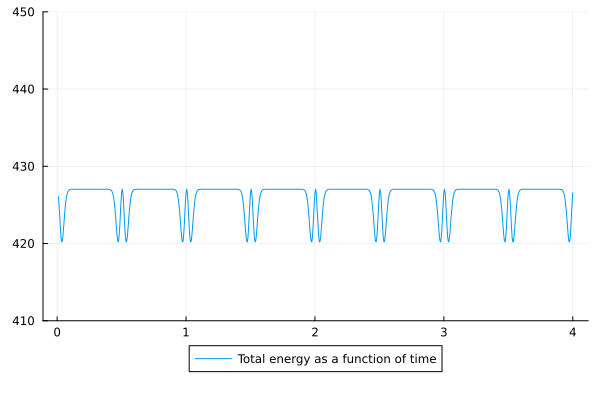

In [133]:
T = 4;
L = 2;
nn = 800
ni = 400
dt = T / nn
dx = L / ni
t, x = coords(nn, ni, dt, dx);
u = gaussian(t,x,1,0.2);

@show dt,dx,dx/dt

evolve!(u, dt, dx);
epsilon = density(u,dx,dt);
nt = [n for n in 2:nn];
energy = integrate(epsilon, nt, dx);
Plots.plot(nt*dt,energy,ylims = (410,450),legend=:outerbottom,label="Total energy as a function of time")


## We can see that the energy is almost constant, and by increasing the resolution, the errors would decrease: 

(dt, dx, dx / dt) = (0.00125, 0.00125, 1.0)


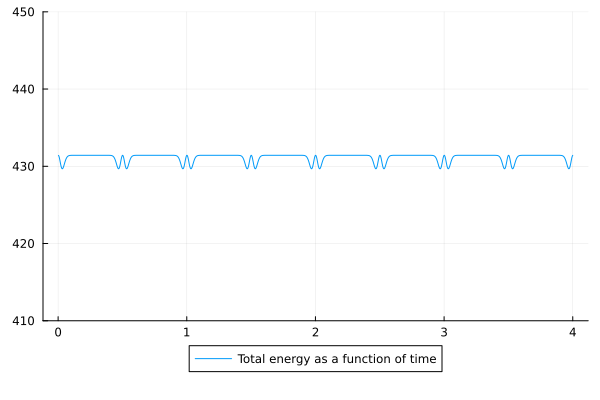

In [132]:
T = 4;
L = 2;
nn = 3200
ni = 1600
dt = T / nn
dx = L / ni
t, x = coords(nn, ni, dt, dx);
u = gaussian(t,x,1,0.2);

@show dt,dx,dx/dt

evolve!(u, dt, dx);
epsilon = density(u,dx,dt);
nt = [n for n in 2:nn];
energy = integrate(epsilon, nt, dx);
Plots.plot(nt*dt,energy,ylims = (410,450),legend=:outerbottom,label="Total energy as a function of time")
